In [ ]:
!python --version

In [ ]:
import tensorflow
print(tensorflow.__version__)

In [12]:
import cv2
import numpy as np
import os
import time
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

class_labels = ['Advaith', 'Agastya', 'Deepthi', 'Muruli']  # replace with your actual class names
#class_labels = ['Deepthi','Muruli']

# Load and preprocess the image
def load_and_preprocess_image(img, target_size=(224, 224)):
    if img.shape[:2] != target_size:
        img = cv2.resize(img, target_size)
    img = np.expand_dims(img, axis=0)
    return img

   
from keras.models import load_model
model = load_model(r"C:\Users\deept\Downloads\MobileNetV3Small_FaceClassifier.keras")

# Load the Haar cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Open video file
video = cv2.VideoCapture(1)

while True:
    ret, frame = video.read()
    if not ret:
        print("Failed to grab frame or end of video.")
        break

    # Convert the frame to grayscale for face detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Loop through detected faces and draw bounding boxes
    gg = frame.copy()
    for (x, y, w, h) in faces:
        cropped_face = gg[y:y+h, x:x+w]
        img = load_and_preprocess_image(cropped_face)
        predictions = model.predict(img)
        predicted_class = np.argmax(predictions[0])
        predicted_class_name = class_labels[predicted_class]
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
        
    
       # Text to be displayed at the bottom of the bounding box
        text = predicted_class_name
        font = cv2.FONT_HERSHEY_SIMPLEX
        font_scale = 0.7
        color = (255, 0, 0)  # Blue color
        thickness = 2

        # Calculate the position to place the text at the bottom of the bounding box
        text_size = cv2.getTextSize(text, font, font_scale, thickness)[0]
        text_x = x + (w - text_size[0]) // 2  # Centering the text
        text_y = y + h + text_size[1] + 5  # Position slightly below the box

        # Put the text on the frame
        cv2.putText(frame, text, (text_x, text_y), font, font_scale, color, thickness)

    # Display the frame with face detections and text
    cv2.imshow('Video', frame)

    # Press 'q' to exit the video display loop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

video.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━

In [21]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

def load_and_preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size, color_mode='rgb')
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

def predict_folder(model, root_folder_path, class_labels, target_size=(224, 224)):
    total_images = 0
    for subdir, dirs, files in os.walk(root_folder_path):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                img_path = os.path.join(subdir, file)
                try:
                    input_image = load_and_preprocess_image(img_path, target_size=target_size)
                    predictions = model.predict(input_image)
                    predicted_class = np.argmax(predictions[0])
                    predicted_class_name = class_labels[predicted_class]
                    print(f"Image: {img_path} | Predicted class: {predicted_class_name}")
                    total_images += 1
                except Exception as e:
                    print(f"Error processing {img_path}: {e}")
    print(f"\nTotal images processed: {total_images}")


In [18]:
from keras.models import load_model
model = load_model(r"C:\Users\deept\Downloads\ResNet50_FaceClassifier.keras")

In [22]:
class_labels = ['Advaith', 'Agastya', 'Deepthi', 'Muruli']  # replace with your actual class names
folder_path = r"C:\Users\deept\OneDrive\Desktop\CNN_OutputFolder\test"  # replace with the path to the folder
predict_folder(model, folder_path, class_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
Image: C:\Users\deept\OneDrive\Desktop\CNN_OutputFolder\test\Advaith\blur_img0.jpg | Predicted class: Agastya
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step
Image: C:\Users\deept\OneDrive\Desktop\CNN_OutputFolder\test\Advaith\blur_img108.jpg | Predicted class: Agastya
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
Image: C:\Users\deept\OneDrive\Desktop\CNN_OutputFolder\test\Advaith\blur_img123.jpg | Predicted class: Agastya
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step
Image: C:\Users\deept\OneDrive\Desktop\CNN_OutputFolder\test\Advaith\blur_img144.jpg | Predicted class: Agastya
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step
Image: C:\Users\deept\OneDrive\Desktop\CNN_OutputFolder\test\Advaith\blur_img154.jpg | Predicted class: Agastya
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step
Image: C:\Users\deept\OneDrive\Desktop\CNN_OutputFolder\test\Advaith\blur_img156.jpg | Predicted class: Agastya
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step
Image: C:\Users\deept\OneDrive\Desktop\CNN_OutputFolder\test

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
Image: C:\Users\deept\OneDrive\Desktop\CNN_OutputFolder\test\Advaith\blur_img0.jpg | True: Advaith | Predicted: Agastya
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
Image: C:\Users\deept\OneDrive\Desktop\CNN_OutputFolder\test\Advaith\blur_img108.jpg | True: Advaith | Predicted: Agastya
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
Image: C:\Users\deept\OneDrive\Desktop\CNN_OutputFolder\test\Advaith\blur_img123.jpg | True: Advaith | Predicted: Agastya
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
Image: C:\Users\deept\OneDrive\Desktop\CNN_OutputFolder\test\Advaith\blur_img144.jpg | True: Advaith | Predicted: Agastya
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step
Image: C:\Users\deept\OneDrive\Desktop\CNN_OutputFolder\test\Advaith\blur_img154.jpg | True: Advaith | Predicted: Agastya
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step
Image: C:\Users\deept\OneDrive\Desktop\CNN_OutputFolder\test\Advaith\blur_img156.jpg | True: Advaith | Predicted: Agastya
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


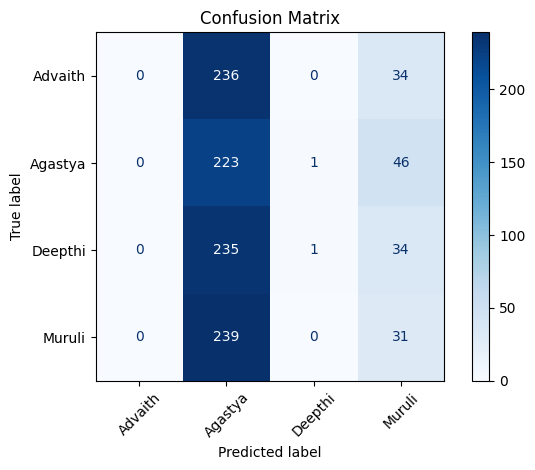

In [28]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load and preprocess image
def load_and_preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size, color_mode='rgb')
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Predict and collect actual/predicted labels
def predict_and_collect(model, root_folder_path, class_labels, target_size=(224, 224)):
    y_true = []
    y_pred = []

    for subdir, dirs, files in os.walk(root_folder_path):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                img_path = os.path.join(subdir, file)
                true_label = os.path.basename(os.path.dirname(img_path))
                try:
                    input_image = load_and_preprocess_image(img_path, target_size=target_size)
                    prediction = model.predict(input_image)
                    predicted_class_index = np.argmax(prediction[0])
                    predicted_class = class_labels[predicted_class_index]

                    y_true.append(true_label)
                    y_pred.append(predicted_class)

                    print(f"Image: {img_path} | True: {true_label} | Predicted: {predicted_class}")
                except Exception as e:
                    print(f"Error processing {img_path}: {e}")
    
    return y_true, y_pred

# Plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, class_labels):
    cm = confusion_matrix(y_true, y_pred, labels=class_labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(cmap="Blues", xticks_rotation=45)
    plt.title("Confusion Matrix")
    plt.tight_layout()
    plt.show()

# Usage
class_labels = ['Advaith', 'Agastya', 'Deepthi', 'Muruli']
folder_path = r"C:\Users\deept\OneDrive\Desktop\CNN_OutputFolder\test"
model_path = r"C:\Users\deept\Downloads\ResNet50_FaceClassifier.keras"



model = load_model(model_path)

y_true, y_pred = predict_and_collect(model, folder_path, class_labels)
plot_confusion_matrix(y_true, y_pred, class_labels)


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load and preprocess image
def load_and_preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size, color_mode='rgb')
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Predict and collect actual/predicted labels
def predict_and_collect(model, root_folder_path, class_labels, target_size=(224, 224)):
    y_true = []
    y_pred = []

    for subdir, dirs, files in os.walk(root_folder_path):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                img_path = os.path.join(subdir, file)
                true_label = os.path.basename(os.path.dirname(img_path))
                try:
                    input_image = load_and_preprocess_image(img_path, target_size=target_size)
                    prediction = model.predict(input_image)
                    predicted_class_index = np.argmax(prediction[0])
                    predicted_class = class_labels[predicted_class_index]

                    y_true.append(true_label)
                    y_pred.append(predicted_class)

                    print(f"Image: {img_path} | True: {true_label} | Predicted: {predicted_class}")
                except Exception as e:
                    print(f"Error processing {img_path}: {e}")
    
    return y_true, y_pred

# Plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, class_labels):
    cm = confusion_matrix(y_true, y_pred, labels=class_labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(cmap="Blues", xticks_rotation=45)
    plt.title("Confusion Matrix")
    plt.tight_layout()
    plt.show()

# Usage
class_labels = ['Advaith', 'Agastya', 'Deepthi', 'Muruli']
folder_path = r"C:\Users\deept\OneDrive\Desktop\CNN_OutputFolder\test"
model_path = r"C:\Users\deept\Downloads\VGG19_FaceClassifier.keras"



model = load_model(model_path)

y_true, y_pred = predict_and_collect(model, folder_path, class_labels)
plot_confusion_matrix(y_true, y_pred, class_labels)


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Image: C:\Users\deept\OneDrive\Desktop\CNN_OutputFolder\test\Advaith\blur_img0.jpg | True: Advaith | Predicted: Muruli
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step
Image: C:\Users\deept\OneDrive\Desktop\CNN_OutputFolder\test\Advaith\blur_img108.jpg | True: Advaith | Predicted: Muruli
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step
Image: C:\Users\deept\OneDrive\Desktop\CNN_OutputFolder\test\Advaith\blur_img123.jpg | True: Advaith | Predicted: Agastya
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step
Image: C:\Users\deept\OneDrive\Desktop\CNN_OutputFolder\test\Advaith\blur_img144.jpg | True: Advaith | Predicted: Agastya
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step
Image: C:\Users\deept\OneDrive\Desktop\CNN_OutputFolder\test\Advaith\blur_img154.jpg | True: Advaith | Predicted: Agastya
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step
Image: C:\Users\deept\OneDrive\Desktop\CNN_OutputFolder\test\Advaith\blur_img156.jpg | True: Advaith | Predicted: Agastya
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step
Im

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
Image: C:\Users\deept\OneDrive\Desktop\CNN_OutputFolder\test\Advaith\blur_img0.jpg | True: Advaith | Predicted: Muruli
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
Image: C:\Users\deept\OneDrive\Desktop\CNN_OutputFolder\test\Advaith\blur_img108.jpg | True: Advaith | Predicted: Muruli
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
Image: C:\Users\deept\OneDrive\Desktop\CNN_OutputFolder\test\Advaith\blur_img123.jpg | True: Advaith | Predicted: Muruli
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
Image: C:\Users\deept\OneDrive\Desktop\CNN_OutputFolder\test\Advaith\blur_img144.jpg | True: Advaith | Predicted: Muruli
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
Image: C:\Users\deept\OneDrive\Desktop\CNN_OutputFolder\test\Advaith\blur_img154.jpg | True: Advaith | Predicted: Muruli
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
Image: C:\Users\deept\OneDrive\Desktop\CNN_OutputFolder\test\Advaith\blur_img156.jpg | True: Advaith | Predicted: Muruli
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
Image:

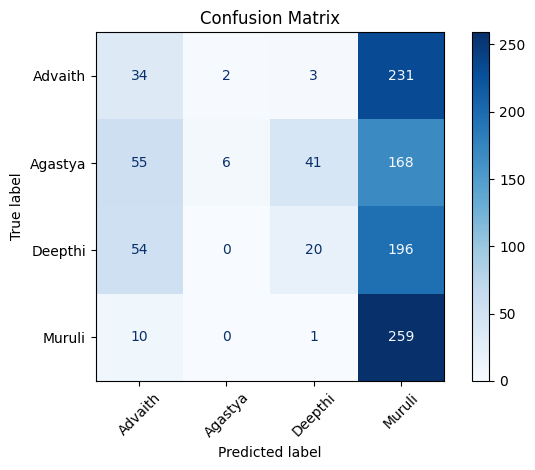

In [32]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load and preprocess image
def load_and_preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size, color_mode='rgb')
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Predict and collect actual/predicted labels
def predict_and_collect(model, root_folder_path, class_labels, target_size=(224, 224)):
    y_true = []
    y_pred = []

    for subdir, dirs, files in os.walk(root_folder_path):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                img_path = os.path.join(subdir, file)
                true_label = os.path.basename(os.path.dirname(img_path))
                try:
                    input_image = load_and_preprocess_image(img_path, target_size=target_size)
                    prediction = model.predict(input_image)
                    predicted_class_index = np.argmax(prediction[0])
                    predicted_class = class_labels[predicted_class_index]

                    y_true.append(true_label)
                    y_pred.append(predicted_class)

                    print(f"Image: {img_path} | True: {true_label} | Predicted: {predicted_class}")
                except Exception as e:
                    print(f"Error processing {img_path}: {e}")
    
    return y_true, y_pred

# Plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, class_labels):
    cm = confusion_matrix(y_true, y_pred, labels=class_labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(cmap="Blues", xticks_rotation=45)
    plt.title("Confusion Matrix")
    plt.tight_layout()
    plt.show()

# Usage
class_labels = ['Advaith', 'Agastya', 'Deepthi', 'Muruli']
folder_path = r"C:\Users\deept\OneDrive\Desktop\CNN_OutputFolder\test"
model_path = r"C:\Users\deept\Downloads\MobileNetV3Small_FaceClassifier.keras"

model = load_model(model_path)

y_true, y_pred = predict_and_collect(model, folder_path, class_labels)
plot_confusion_matrix(y_true, y_pred, class_labels)


In [3]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Calculate scores
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)

print(f"\nAccuracy: {accuracy:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1 Score (weighted): {f1:.4f}")

# Optional: Detailed class-wise performance
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels, zero_division=0))


Accuracy: 0.4778
Precision (weighted): 0.7786
Recall (weighted): 0.4778
F1 Score (weighted): 0.4289

Classification Report:
              precision    recall  f1-score   support

     Advaith       1.00      0.01      0.03       270
     Agastya       0.34      0.99      0.50       270
     Deepthi       0.98      0.39      0.55       270
      Muruli       0.80      0.52      0.63       270

    accuracy                           0.48      1080
   macro avg       0.78      0.48      0.43      1080
weighted avg       0.78      0.48      0.43      1080

